Floresta aleatória 
==================



#### Previsão do calor de formação



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Definição das features e target
FEATURES =["Be", "As", "O", "Ca", "Fe", "S", "In","Se","Sc","V","Zr","B","H","Te","Al","Mg","Ba","Pb","Mn","Si","Cr","Br","Ga","Hf","Ge","Ti","C","I","Li","Cl","Sr","Na","Nb","Ni","Ta","Pd","Pt","Tl","W","Sb","N","Cd","Cu","Sn","F","P","Ag","Au","Bi","Co","Zn","Rb","Os","Hg","Ir","Mo","Re","Rh","Ru","Y","Cs","K"]
TARGET = ['Heat of formation']

# Tamanho do conjunto de teste e semente aleatória
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

# Leitura do dataset
df = pd.read_csv("dataset_C2DB.csv")

# Reindexa o DataFrame com as colunas de interesse
df = df.reindex(FEATURES + TARGET, axis=1)

# Remove linhas onde o valor da target é NaN
df = df.dropna(subset=TARGET)

indices = df.index

# Separa os dados de treino e teste
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

# Cria um modelo de regressão com Random Forest
modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# Treina o modelo
modelo_rf.fit(X_treino, y_treino)

# Realiza previsões no conjunto de teste
y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

# Calcula o erro quadrático médio (RMSE)
RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} unidades de y.")



O RMSE do modelo árvore de decisão foi de 0.7855887602053152 unidades de y.


## Hiperparâmetros



In [2]:
from itertools import product

NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )


# Treinando o modelo com os dados de treino
    modelo_rf.fit(X_treino, y_treino)

# Realizando previsões no conjunto de teste
    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    
# Calculando o erro quadrático médio (RMSE)

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

 # Imprimindo o RMSE para os parâmetros atuais

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f} unidades de y."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 0.80 unidades de y.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 0.79 unidades de y.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=None foi de 0.78 unidades de y.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 0.73 unidades de y.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 0.73 unidades de y.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=3 foi de 0.73 unidades de y.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 0.73 unidades de y.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 0.73 unidades de y.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=6 e max_depth=None foi de 0.73 unidades de y.
O RMSE do modelo RF usando n_estimators=10 max_le

In [3]:

# Definindo o número de árvores no modelo de Random Forest e o número de núcleos de CPU a serem usados
N_ARVORES = 300
N_JOBS = 3

# Criando o modelo de Random Forest
modelo_rf = RandomForestRegressor(
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,
)

# Treinando o modelo com os dados de treino
modelo_rf.fit(X_treino, y_treino)


RandomForestRegressor(n_estimators=300, n_jobs=3, random_state=61455)

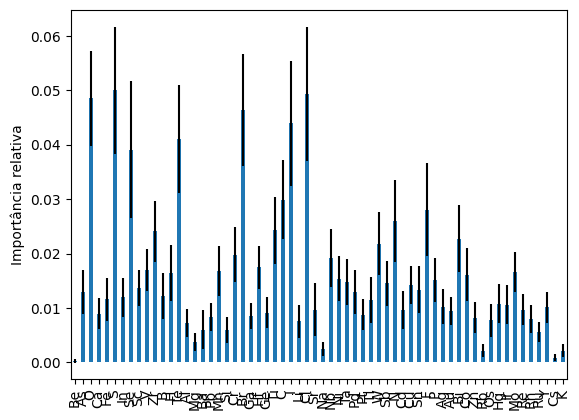

In [4]:
# Obtendo a importância das features do modelo treinado
importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)
serie_importancia = pd.Series(importancia, index=FEATURES)
fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Importância relativa")
plt.show()

## Referências



1.  IZBICKI, Rafael; DOS SANTOS, Tiago Mendonça. Aprendizado de máquina: uma abordagem estatística. 2020. Disponível em: [http://www.rizbicki.ufscar.br/ame/](http://www.rizbicki.ufscar.br/ame/).

2.  Vídeo da Leslie Myint sobre florestas aleatórias [https://www.youtube.com/watch?v=FurqoUSdAPM](https://www.youtube.com/watch?v=FurqoUSdAPM)

3.  StatQuest sobre florestas aleatórias [https://www.youtube.com/watch?v=J4Wdy0Wc_xQ](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)

4.  Documentação do `scikit-learn` sobre florestas aleatórias para regressão [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

5.  Vídeo sobre a importância dos atributos em uma floresta aleatória [https://www.youtube.com/watch?v=cw4qG9ePZ9Y](https://www.youtube.com/watch?v=cw4qG9ePZ9Y)

6.  Tutorial `scikit-learn` sobre importância de florestas aleatórias [https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

7. ChatGPT para resolução de erros.

